In [6]:
from scipy.stats import norm
from scipy.stats import sem, t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [6]:
#1. Call up the documentation for the `norm` function imported above. What is the second listed method?
print('pdf(x, loc=0, scale=1), Probability density function')


pdf(x, loc=0, scale=1), Probability density function


In [11]:
#2 Use the method that generates random variates to draw five samples from the standard normal distribution.
seed(47)
sample = norm.rvs(scale=1, size=5)
sample

array([-0.84800948,  1.30590636,  0.92420797,  0.6404118 , -1.05473698])

In [19]:
#3 What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.
mean_sample = np.mean(sample)
print(mean_sample)
'Expected Zero, but .19 is reasonably close.'

0.19355593334131074


'Expected Zero, but .19 is reasonably close.'

In [20]:
#4 What is the standard deviation of these numbers? Manually Calculate 
std = np.sqrt(np.sum((sample - mean_sample) ** 2)/len(sample))
std

0.9606195639478641

In [22]:
#5 If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction
best_est = np.sqrt(np.sum((sample - mean_sample) ** 2)/(len(sample) - 1))
best_est

1.0740053227518152

In [30]:
#6 Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?
print(np.std(sample))
'Returned the manually calculated std, not Bessels correction'

0.9606195639478641


'Returned the manually calculated std, not Bessels correction'

In [31]:
#7 Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.
np.std(sample, ddof=1)

1.0740053227518152

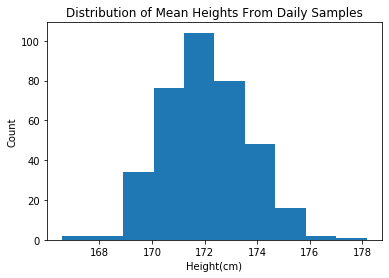

In [9]:
#8 Simulate taking a sample of 10 people every day for a year from a town with population of 50000
# mean height of 172cm and std of 5 cm
# calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

seed(47)
town = norm.rvs(172, 5, 50000)
def daily_sample(n):
    return np.random.choice(town, n)
daily_means = np.empty(365)
for i in range(365):
    sample = daily_sample(10)
    daily_means[i] = np.mean(sample)
plt.hist(daily_means)
plt.xlabel('Height(cm)')
plt.ylabel('Count')
plt.title('Distribution of Mean Heights From Daily Samples')
plt.show()

In [10]:
#9 Verify the above results from the CLT 
std_mean = 5/np.sqrt(10)
std_mean2 = np.std(daily_means)
std_mean, std_mean2

(1.5811388300841895, 1.590245247149885)

I expect the results to be more precise, narrower distribution


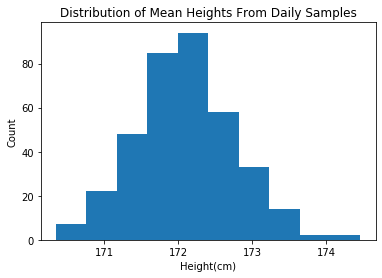

Summary Statistics: Comparing CLT to Sample Mean


(0.7071067811865475, 0.6685984060079219)

In [11]:
#10 Repeat the daily samples but now with a sample size of 50 people each day
print('I expect the results to be more precise, narrower distribution')
daily_means = np.empty(365)
for i in range(365):
    sample = daily_sample(50)
    daily_means[i] = np.mean(sample)
plt.hist(daily_means)
plt.xlabel('Height(cm)')
plt.ylabel('Count')
plt.title('Distribution of Mean Heights From Daily Samples')
plt.show()
print('Summary Statistics: Comparing CLT to Sample Mean')
std_mean = 5/np.sqrt(50)
std_mean2 = np.std(daily_means)
std_mean, std_mean2

In [12]:
#11 Calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution
zscore = (2*.341) + .136 + .021 + .01
print(zscore)
print('Or look up tables: .841')

0.8490000000000001
Or look up tables: .841


In [13]:
#12 Use the cdf() function to answer the above question
norm.cdf(1)

0.8413447460685429

In [14]:
#13 Probability of selecting one person at random and their height being 177cm or less?
print('standard deviation is 5cm, so probability of selecting a person one standard deviation above the mean is .841')
print(norm.cdf(1))


standard deviation is 5cm, so probability of selecting a person one standard deviation above the mean is .841
0.8413447460685429


In [15]:
#14 We Measure someone 2.00m tall, how likely would it be to obtain a value at least as extreme as this?
standdev = (200 - 172)/5
print(1 - norm.cdf(standdev))
print('not very likely...')

1.0717590259723409e-08
not very likely...


In [16]:
#15 Sample the heights of 50 townfolk. Estimate the population mean and std 
samp_50 = daily_sample(50)
mean_est = np.mean(samp_50)
std_est = np.std(samp_50, ddof=1)
print('population mean estimate', mean_est)
print('population std estimate', std_est)

population mean estimate 172.53451073933155
population std estimate 4.785856674829523


In [17]:
#16 Calculate the margin of error for 95% confidence
marg_error = norm.ppf(.975) * (std_est/np.sqrt(50))
print(marg_error)

1.3265474136871336


In [18]:
#17 Calculate the 95% confidence interval of the mean
print(mean_est - marg_error,' - ', mean_est + marg_error)
print('Yes, True population mean of 172cm is in the confidence interval')

171.2079633256444  -  173.8610581530187
Yes, True population mean of 172cm is in the confidence interval


In [19]:
#18 confidence interval above was calculated using critical z value.
print('This is a problem because we started this exercise stating that we know nothing about our population(dont know population standard deviation), thus we should use t-score')

This is a problem because we started this exercise stating that we know nothing about our population(dont know population standard deviation), thus we should use t-score


In [20]:
#19 Calculate the 95% confidence interval using the t distribution. Wider or Narrower?
marg_error = t.ppf(.975, 49) * (std_est/np.sqrt(50))
print(marg_error)
print(mean_est - marg_error,' - ', mean_est + marg_error, '(A bit wider than z-score)')




1.3601254160529685
171.17438532327859  -  173.89463615538452 (A bit wider than z-score)
